# Advanced Physics Laboratory: analysis of beam profile with foil

## Load packages

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import sys
import subprocess

## Convert waveform files to numpy array and store

### Path to data

In [2]:
USER_PATH = "/home/rocco/University/APL/Lab/"
DATA_PATH = USER_PATH + "data/Au_3h_50k_-30_30"

### Unzip all data archives and get number of events

In [3]:
os.chdir(DATA_PATH)
for d in os.listdir("."):
    os.chdir(d)
    
    if not os.path.exists("data"):
        os.system("unzip data.zip -d data")
    os.chdir("../")

### Convert to numpy array

In [8]:
os.chdir(DATA_PATH)
for d in os.listdir("."):
    os.chdir(d)
    
    print("Storing in numpy array for:", d)
    if not os.path.exists(d+".npy"):
        N = len(os.listdir("./data"))
        M = 5000

        data = np.zeros((N,M),dtype=np.int16)
        for f,i in zip(os.listdir("./data"), range(N)):
            data[i,:] = np.loadtxt("./data/run_"+str(i)+"_segment_0.rpsd")
            if i%1000==0:
                sys.stdout.write('\r    Segment: '+str(i))
        np.save(d+".npy", data)

    os.chdir("../")

Storing in numpy array for: 8_DX
Storing in numpy array for: 5_DX
Storing in numpy array for: 6_DX
    Segment: 49000Storing in numpy array for: 19_DX
    Segment: 0Storing in numpy array for: 13_DX
    Segment: 49000Storing in numpy array for: 1_DX
    Segment: 49000Storing in numpy array for: 18_DX
    Segment: 1000Storing in numpy array for: 15_DX
    Segment: 23000Storing in numpy array for: 14_DX
    Segment: 42000Storing in numpy array for: 2_DX
    Segment: 49000Storing in numpy array for: 17_DX
    Segment: 3000Storing in numpy array for: 3_DX
    Segment: 49000Storing in numpy array for: 4_DX
    Segment: 49000Storing in numpy array for: 12_DX
    Segment: 49000Storing in numpy array for: 9_DX
    Segment: 49000Storing in numpy array for: 10_DX
    Segment: 49000Storing in numpy array for: 11_DX
    Segment: 49000Storing in numpy array for: 16_DX
    Segment: 10000Storing in numpy array for: 20_DX
    Segment: 0Storing in numpy array for: 0
    Segment: 49000Storing in numpy a

## Load data

In [9]:
os.chdir(DATA_PATH)
os.chdir("0")

data = np.load("0.npy")
os.chdir(DATA_PATH)
data.shape

(50000, 5000)

## Analysis

### **[Example: 0]**

#### **[Example: 0]** Plot of waveforms

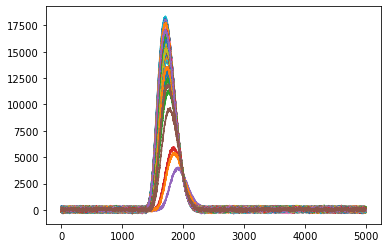

In [60]:
for i in range(data.shape[0]):
    plt.plot(data[i])
plt.show()

#### **[Example: 0]** Plot of integrals of waveforms

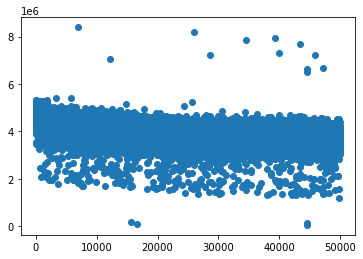

In [10]:
data_int = np.sum(data, axis=1)

plt.plot(data_int, "o")
plt.show()

#### **[Example: 0]** Plot of filtered integrals of waveforms

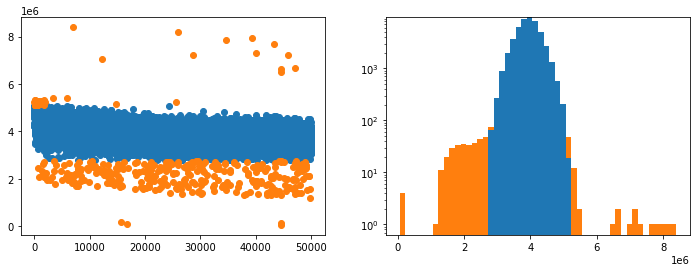

In [11]:
data_int_mean = np.mean(data_int)
data_int_var  = np.std(data_int)

mask_t = np.logical_and(data_int<data_int_mean+data_int_var*3, data_int>data_int_mean-data_int_var*3)
mask_f = np.logical_not(mask_t)

fig=plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(np.where(mask_t)[0], data_int[mask_t], "o")
plt.plot(np.where(mask_f)[0], data_int[mask_f], "o")

plt.subplot(1,2,2)
plt.hist([data_int[mask_t], data_int[mask_f]], bins=50, stacked=True)
plt.yscale("log")
plt.show()

### Now for every angle

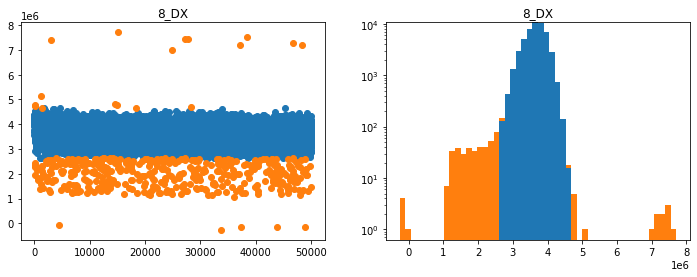

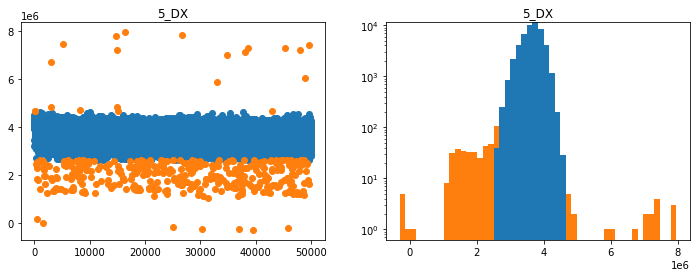

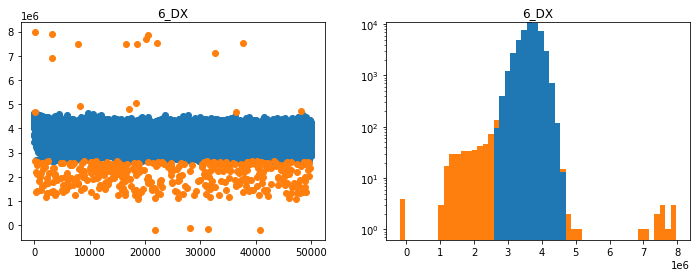

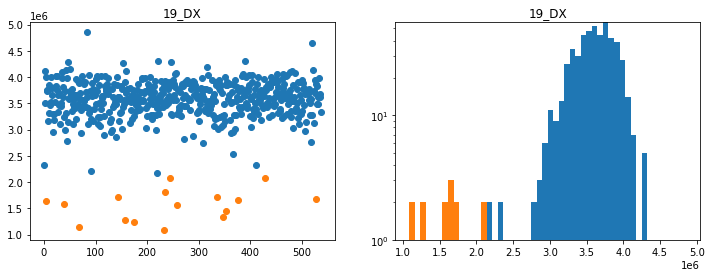

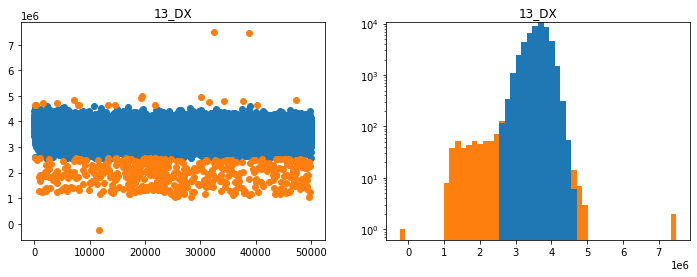

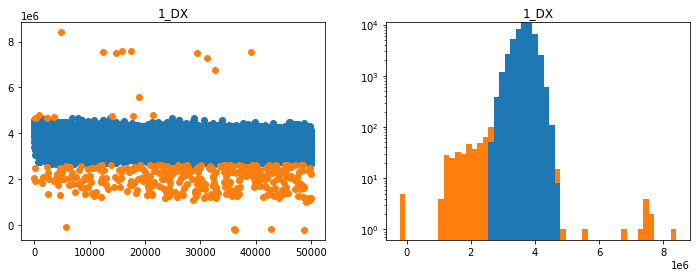

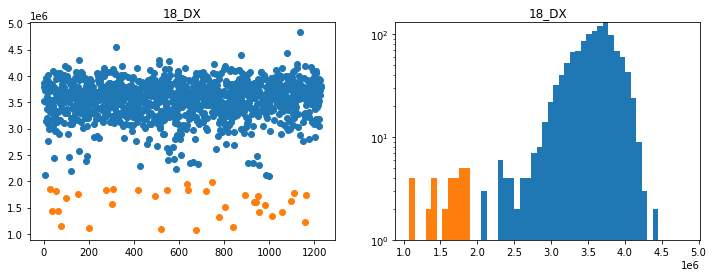

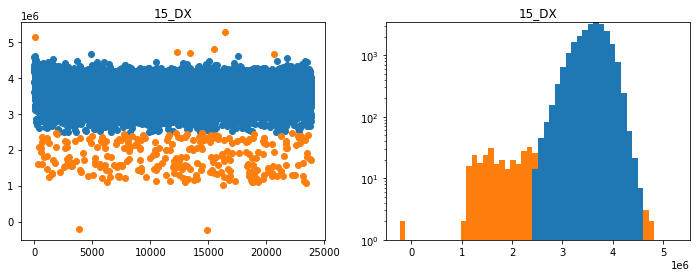

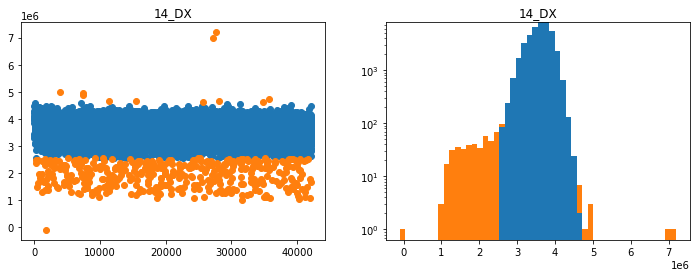

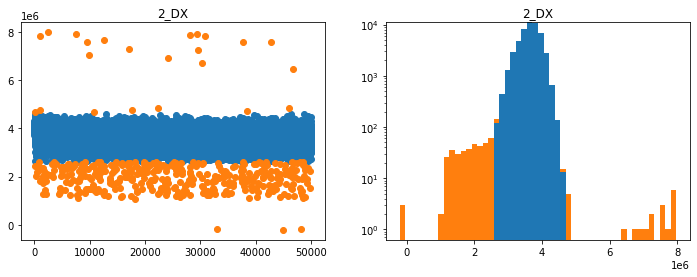

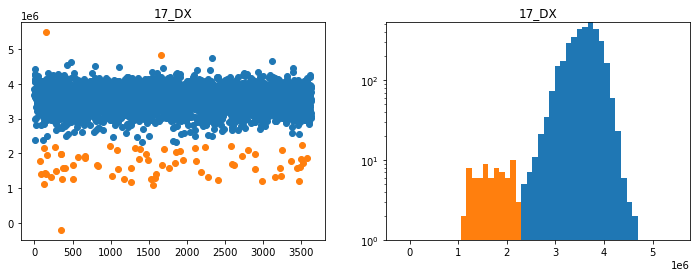

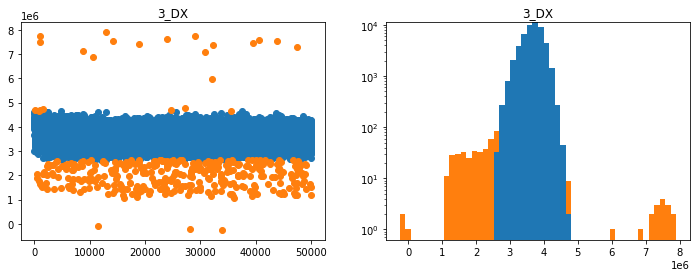

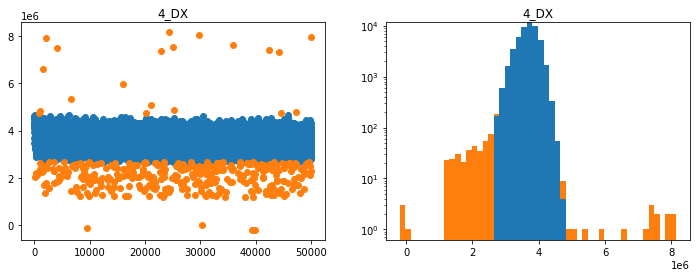

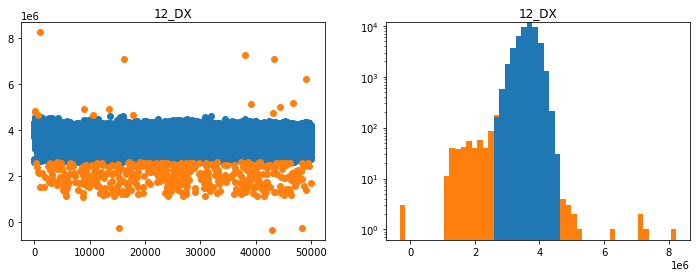

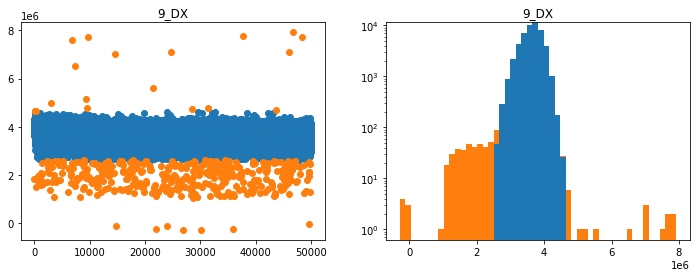

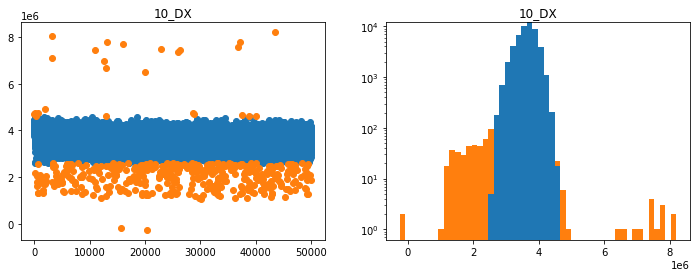

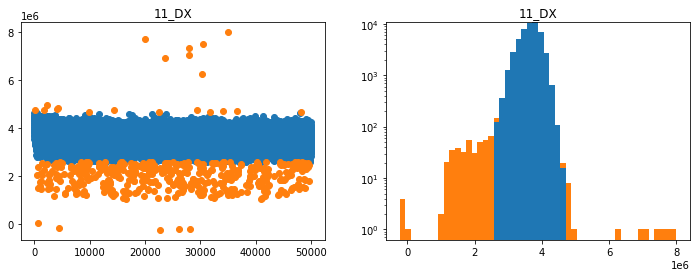

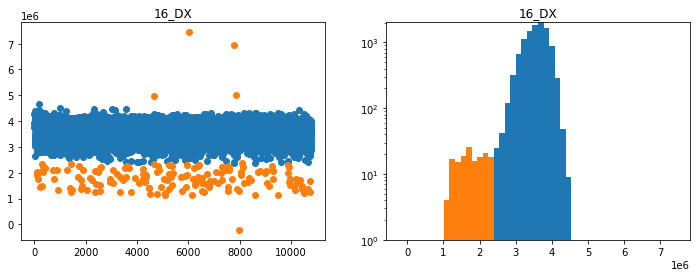

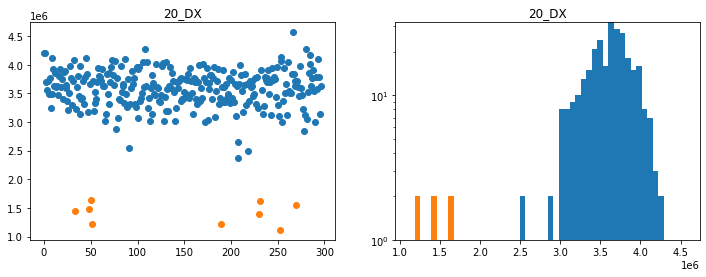

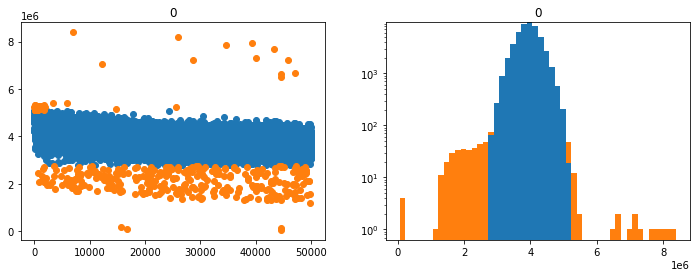

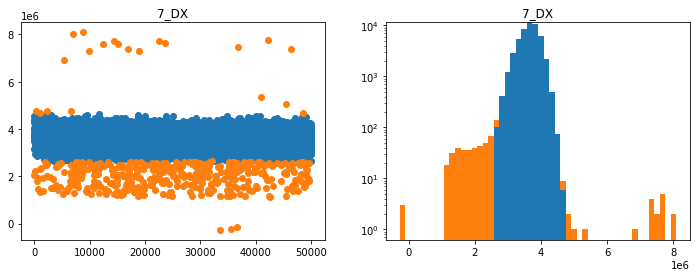

In [58]:
angles = []
events = []
times  = []

PLOT_DATA = True

os.chdir(DATA_PATH)
for d in os.listdir("."):
    os.chdir(d)
    
    if "DX" in d:
        sign = +1
    elif "SX" in d:
        sign = -1
    else:
        sign = 0
    
    angles.append(sign * int(''.join(filter(lambda i: i.isdigit(), d))) * 0.9 * np.pi / 180.0)

    data          = np.load(d+".npy")
    data_int      = np.sum(data, axis=1)
    data_int_mean = np.mean(data_int)
    data_int_var  = np.std(data_int)

    mask_t = np.logical_and(data_int<data_int_mean+data_int_var*3, data_int>data_int_mean-data_int_var*3)
    mask_f = np.logical_not(mask_t)
    
    p_s = subprocess.run(["head", "-n 1", "run_BlockTimes.txt"], stdout=subprocess.PIPE)
    p_f = subprocess.run(["tail", "-n 1", "run_BlockTimes.txt"], stdout=subprocess.PIPE)
    t_s = p_s.stdout.decode('utf-8').strip().split('\t')
    t_f = p_f.stdout.decode('utf-8').strip().split('\t')
    times.append(float(t_f[1]) - float(t_s[0]))
    
    
    events.append(data_int[mask_t].shape[0] / (float(t_f[1]) - float(t_s[0])) * 3600)
    
    if PLOT_DATA:
        fig=plt.figure(figsize=(12, 4))
        plt.subplot(1,2,1)
        if mask_f.shape[0] != 0:
            plt.plot(np.where(mask_t)[0], data_int[mask_t], "o")
            plt.plot(np.where(mask_f)[0], data_int[mask_f], "o")
        else:
            plt.plot(np.where(mask_t)[0], data_int[mask_t], "o")
        plt.title(d)

        plt.subplot(1,2,2)
        if mask_f.shape[0] != 0:
            plt.hist([data_int[mask_t], data_int[mask_f]], bins=50, stacked=True)
        else:
            plt.hist(data_int[mask_t], bins=50, stacked=True)
        plt.yscale("log")
        plt.title(d)
        plt.show()

    os.chdir(DATA_PATH)

In [35]:
os.chdir(DATA_PATH)
os.chdir("0")

p_s = subprocess.run(["head", "-n 1", "run_BlockTimes.txt"], stdout=subprocess.PIPE)
p_f = subprocess.run(["tail", "-n 1", "run_BlockTimes.txt"], stdout=subprocess.PIPE)
t_s = p_s.stdout.decode('utf-8').strip().split('\t')
t_f = p_f.stdout.decode('utf-8').strip().split('\t')
print(t_s)
print(float(t_f[1]) - float(t_s[0]))
#float(res.strip()) for res in results]
#subprocess.call("head run_BlockTimes.txt -n 1", shell=True)
#os.system("head run_BlockTimes.txt -n 1")
os.chdir(DATA_PATH)

['1604071867.7', '1604071867.71']
2354.609999895096


### Events distribution

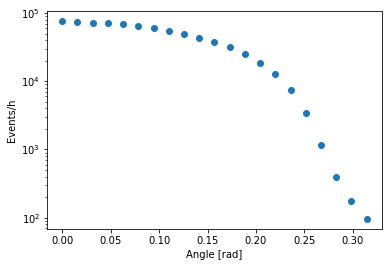

In [59]:
plt.plot(angles, events, "o")
plt.xlabel("Angle [rad]")
plt.ylabel("Events/h")
plt.yscale("log")
plt.show()

In [57]:
np.vstack((np.round(np.array(angles)*180/np.pi,2),np.array(events), np.array(angles))).T

array([[7.20000000e+00, 4.97603007e+04, 1.25663706e-01],
       [4.50000000e+00, 6.41706965e+04, 7.85398163e-02],
       [5.40000000e+00, 6.01791733e+04, 9.42477796e-02],
       [1.71000000e+01, 1.73421927e+02, 2.98451302e-01],
       [1.17000000e+01, 1.86880935e+04, 2.04203522e-01],
       [9.00000000e-01, 7.28864911e+04, 1.57079633e-02],
       [1.62000000e+01, 3.97514380e+02, 2.82743339e-01],
       [1.35000000e+01, 7.52612907e+03, 2.35619449e-01],
       [1.26000000e+01, 1.29613588e+04, 2.19911486e-01],
       [1.80000000e+00, 7.23668838e+04, 3.14159265e-02],
       [1.53000000e+01, 1.17662950e+03, 2.67035376e-01],
       [2.70000000e+00, 7.10451916e+04, 4.71238898e-02],
       [3.60000000e+00, 6.84069627e+04, 6.28318531e-02],
       [1.08000000e+01, 2.53949329e+04, 1.88495559e-01],
       [8.10000000e+00, 4.33487392e+04, 1.41371669e-01],
       [9.00000000e+00, 3.81927796e+04, 1.57079633e-01],
       [9.90000000e+00, 3.18542891e+04, 1.72787596e-01],
       [1.44000000e+01, 3.45814